In [9]:

#  SMS Classifier :
#  Develop a text classification model to classify SMS as either spam or non-spam using data science techniques in Python.


!pip install pandas numpy nltk scikit-learn matplotlib seaborn


In [10]:
# import the all library
import pandas as pd
# pandas - pandas is  a powerful python library it's used for data manipulation and analysis 
# it provide easy to use data structure and data analysis tools.

import numpy as np

# numpy is a powerful python library for numerical computing, it provide support for efficient array operation and mathematical
# function , linear algebra ,random number genration and more with numpy we can work multi dimensional array known as nd array
# and these array are highly optimise for performance and allow you to perform mathematical and logical operation on large 
# dataset efficiently

from sklearn.model_selection import train_test_split
# sklearn(sikit learn) - it a powerful python library for machine learning it provide wide range of tools and algorithm for 
# various machine learning task including classification ,regression,clustring dimensional reduction and model evaluation

# train-test-split= this function is basically used in machine learning task to access the performance of a model 
# and unseen data 
from sklearn.feature_extraction.text import TfidfVectorizer
# TfidVectorizer is nothing is feature of extraction technique commonly used in natural language
# processing NLP and text minning task 
# tfidvectorizer tranfer collection of text documents in to numerical representation that machoine learning 
# algorithm can work with 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
#This line imports the Natural Language Toolkit (NLTK), which is a powerful library for working with human language data in 
# Python. It provides easy-to-use interfaces for tasks like tokenization, stemming, tagging, parsing, and more.
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Load and Explore Data
data = pd.read_csv('mail_data.csv')
# read_csv function is a pandas function that reads data from a CSV file and creates a DataFrame.
print(data.head())
print(data.isnull().sum())

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
label      0
message    0
dtype: int64


In [12]:
# Preprocess Data
X = data['message']
y = data['label'].map({'ham': 0, 'spam': 1})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 	 X: This is the input data (features), like a table of numbers.
# •	y: This is the output or labels associated with each row in the input data.
# The code is using a function called train_test_split from the scikit-learn library. It takes the input data (X and y) and
# splits it into four parts:
# •	X_train: This is a portion of the input data that the model will use for training.
# •	X_test: This is another portion of the input data that the model will use for testing (checking how well it learned).
# •	y_train: These are the corresponding labels for the training data.
# •	y_test: These are the corresponding labels for the test data.
# The test_size=0.2 means that 20% of the data will be reserved for testing, and the remaining 80% will be used for training.
# The random_state=42 is just a way to make sure that every time you run this code, you get the same split. It ensures 
# consistency for reproducibility.

In [15]:
# Text Preprocessing
nltk.download('stopwords')
# This line downloads the stopwords dataset from NLTK. Stopwords are common words like "the," "and," "is," etc
nltk.download('punkt')
# This line downloads the punkt tokenizer model from NLTK. The punkt tokenizer is a pre-trained model for tokenization,
# which is the process of breaking down text into individual words or tokens. 

stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def preprocess_text(text):
    words = word_tokenize(text.lower())
    words = [ps.stem(word) for word in words if word.isalpha() and word not in stop_words]
    return ' '.join(words)

X_train = X_train.apply(preprocess_text)
X_test = X_test.apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sanja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sanja\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [16]:
# Feature Extraction
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
# TfidfVectorizer class from scikit-learn to convert a collection of raw documents (text data) into a matrix of TF-IDF
# (Term Frequency-Inverse Document Frequency) 
X_train_vectorized = tfidf_vectorizer.fit_transform(X_train)
# fit_transform method is used for both fitting the vectorizer on the training data and transforming the training data 
# into the TF-IDF representation.
X_test_vectorized = tfidf_vectorizer.transform(X_test)

In [17]:
# Train a Classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train_vectorized, y_train)

RandomForestClassifier(random_state=42)

In [19]:
# Evaluate the Model
y_pred = classifier.predict(X_test_vectorized) 
# trained classifier to make predictions on the test data 
accuracy = accuracy_score(y_test, y_pred)
# calculates the accuracy of the model by comparing the predicted labels (y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
# computes the confusion matrix, which is a table showing the number of true positive, true negative, false positive, 
# and false negative predictions.
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.97847533632287
Confusion Matrix:
[[966   0]
 [ 24 125]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.84      0.91       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



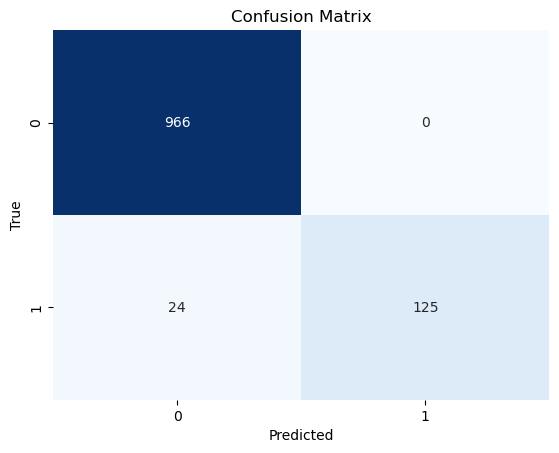

In [23]:
# Visualize Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
# This is the confusion matrix calculated earlier.
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

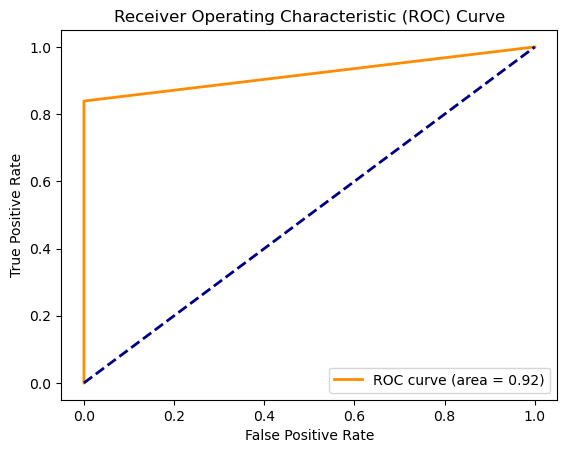

In [24]:
# Visualize ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
# This code is creating and visualizing a Receiver Operating Characteristic (ROC) curve.ROC curves are commonly used to evaluate the performance of a binary classification model, 
# particularly in terms of its sensitivity (True Positive Rate) and specificity (True Negative Rate)